# Pytrad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path+"\\DataPreprocessing")

## Data Preprocessing

In [2]:
data_dir = "C:/Users/diego/iCloudDrive/Documents/MBZUAI Sem/Semester 2/ML703 Probabilistic and Statistical Inference/Project/JN/Datasets/"

company = pd.read_csv(data_dir + "Company.csv")
companyValues = pd.read_csv(data_dir + "CompanyValues.csv")
companyTweet = pd.read_csv(data_dir + "Company_Tweet.csv")
tweet = pd.read_csv(data_dir + "Tweet.csv")
tweet = tweet.merge(companyTweet, on="tweet_id", how='inner')

In [3]:
print(f"Stocks from {company.ticker_symbol.unique()}")

selected_stock = 'TSLA'
print(f"Stock selected: {selected_stock}")
companyValuesSub = companyValues[companyValues.ticker_symbol == selected_stock]
tweetSub = tweet[tweet.ticker_symbol == selected_stock]

Stocks from ['AAPL' 'GOOG' 'GOOGL' 'AMZN' 'TSLA' 'MSFT']
Stock selected: TSLA


In [4]:
print(f"Company values: \n{companyValuesSub.head(3)}")
print(f"Company tweets: \n{tweetSub.head(3)}")

Company values: 
      ticker_symbol    day_date  close_value    volume  open_value  \
14463          TSLA  2020-05-29       835.00  11812490      808.75   
14464          TSLA  2020-05-28       805.81   7275774      813.51   
14465          TSLA  2020-05-27       820.23  11549530      820.86   

       high_value  low_value  
14463      835.00     804.21  
14464      824.75     801.69  
14465      827.71     785.00  
Company tweets: 
             tweet_id         writer   post_date  \
3  550442977802207232   ShowDreamCar  1420070807   
5  550443807834402816   i_Know_First  1420071005   
7  550443808606126081  aaplstocknews  1420071005   

                                                body  comment_num  \
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
5  Swing Trading: Up To 8.91% Return In 14 Days h...            0   
7  Swing Trading: Up To 8.91% Return In 14 Days h...            0   

   retweet_num  like_num ticker_symbol  
3            0         1          

### Tweet data preprocessing

In [5]:
from data import set_datetime, detrend_ts

tweetSub['date'] = set_datetime(tweetSub.post_date)

tweetSubMetrics = tweetSub[['date', 'comment_num', 'retweet_num', 'like_num']]
tweetSubMetrics = tweetSubMetrics.groupby(["date"]).sum()
tweetSubMetrics2019 = tweetSubMetrics[(tweetSubMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (tweetSubMetrics.index <= pd.to_datetime("2019/12/31"))]
tweetSubMetrics2019

tweetSubMetrics2019.head(3)

C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,comment_num,retweet_num,like_num
date,,,
2018-12-25,432,354,3395
2018-12-26,602,815,5048
2018-12-27,778,709,5513


In [6]:
tweetSubMetrics2019['log_retweet_num'] = np.log(tweetSubMetrics2019['retweet_num'])
tweetSubMetrics2019['log_comment_num'] = np.log(tweetSubMetrics2019['comment_num'])

tweetSubMetrics2019['detrended_log_comment_num'] = detrend_ts(tweetSubMetrics2019.log_comment_num)

tweetSubMetrics2019 = tweetSubMetrics2019[-365:]

C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

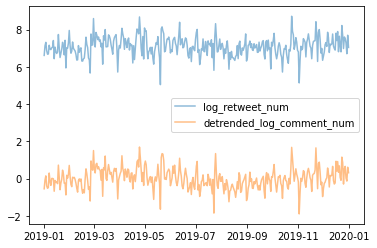

In [7]:
plt.plot(tweetSubMetrics2019.log_retweet_num, alpha=0.5, label="log_retweet_num")
plt.plot(tweetSubMetrics2019.detrended_log_comment_num, alpha=0.5, label="detrended_log_comment_num")
plt.legend()

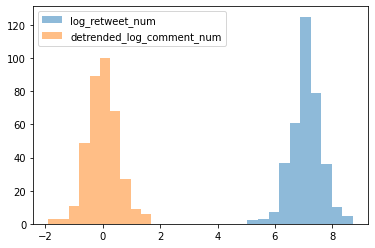

In [8]:
plt.hist(tweetSubMetrics2019.log_retweet_num, alpha=0.5, label="log_retweet_num")
plt.hist(tweetSubMetrics2019.detrended_log_comment_num, alpha=0.5, label="detrended_log_comment_num")
plt.legend()

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(tweetSubMetrics2019.log_retweet_num)
print('Log Retweet Number test:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

result = adfuller(tweetSubMetrics2019.detrended_log_comment_num)
print('Detrended Log Tweet Comment Number test:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Log Retweet Number test:
ADF Statistic: -3.677427
p-value: 0.004442
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
Detrended Log Tweet Comment Number test:
ADF Statistic: -2.804106
p-value: 0.057690
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


### Value data preprocessing

In [10]:
companyValuesSub['date'] = pd.to_datetime(companyValuesSub['day_date']).dt.date
companyValuesSubMetrics = companyValuesSub[['date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value']]
companyValuesSubMetrics = companyValuesSubMetrics.groupby(['date']).sum()
companyValuesSubMetrics2019 = companyValuesSubMetrics[(companyValuesSubMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (companyValuesSubMetrics.index <= pd.to_datetime("2019/12/31"))]

companyValuesSubMetrics2019.head(3)

C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,close_value,volume,open_value,high_value,low_value
date,,,,,
2018-12-25,295.39,5559913,313.50,314.5000,295.195
2018-12-26,326.09,8143102,300.00,326.9700,294.090
2018-12-27,316.13,8567385,319.84,322.1717,301.500


C:\Users\diego\anaconda3\envs\pytrad\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\diego\iCloudDrive\Documents\MBZUAI Sem\Semester 2\ML703 Probabilistic and Statistical Inference\Project\JN\ml703_timeSeriesCausalDiscovery\DataPreprocessing\data.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[lag_column] = temp[-final_ts_len:]


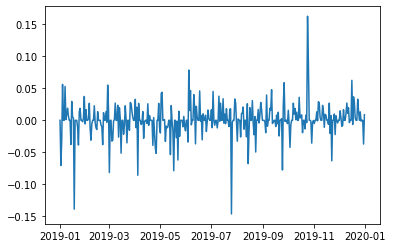

In [11]:
from data import set_datetime, detrend_ts, take_diff_ts

companyValuesSubMetrics2019['log_close_value'] = np.log(companyValuesSubMetrics2019['close_value'])

companyValuesSubMetrics2019 = take_diff_ts(data=companyValuesSubMetrics2019, \
    ts_column='log_close_value', lag_column='lag_log_close_value', lag=1, final_ts_len=365)

plt.plot(companyValuesSubMetrics2019.lag_log_close_value)

(array([  2.,   1.,   8.,  28., 227.,  83.,  13.,   2.,   0.,   1.]),
 array([-0.14634122, -0.11543636, -0.0845315 , -0.05362664, -0.02272178,
         0.00818308,  0.03908794,  0.0699928 ,  0.10089766,  0.13180252,
         0.16270738]),
 <BarContainer object of 10 artists>)

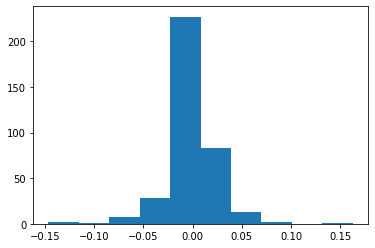

In [12]:
plt.hist(companyValuesSubMetrics2019.lag_log_close_value)

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(companyValuesSubMetrics2019.lag_log_close_value)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -18.635766
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


In [14]:
dataFrame = np.column_stack((companyValuesSubMetrics2019.lag_log_close_value,
                    tweetSubMetrics2019.log_retweet_num,
                    tweetSubMetrics2019.detrended_log_comment_num))
dataFrame[:5]

array([[ 0.        ,  6.61204103, -0.54695628],
       [-0.07058239,  7.12849595, -0.07861812],
       [-0.03197756,  7.31388683,  0.14831061],
       [ 0.05609431,  6.87005341, -0.38452907],
       [ 0.        ,  6.67708346, -0.51965665]])

## PC

In [20]:
from pytrad.search.ConstraintBased import PC
from pytrad.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci ## Conditional Independence test

cg = PC.pc(dataFrame, 0.05, fisherz, True, 0, -1)

0 ind 1 | () with p-value 0.169218

0 ind 2 | () with p-value 0.076545

1 ind 0 | () with p-value 0.169218

2 ind 0 | () with p-value 0.076545



## FCI

In [21]:
from pytrad.search.ConstraintBased.FCI import fci, mod_endpoint
from pytrad.utils.GraphUtils import GraphUtils

G = fci(dataFrame, fisherz, 0.05, verbose=True)

pgv_g = GraphUtils.to_pgv(G)
pgv_g.draw('./FCI/tsla_test.jpeg', prog='dot', format='jpeg')

phase1 remove X1 --- X2 by sepset () pval:0.1692179405019889
phase1 remove X1 --- X3 by sepset () pval:0.0765445967370032


Implemented by Diego Saenz